<a href="https://colab.research.google.com/github/stefanogiagu/corso_AML_2024/blob/main/notebooks/es4/AML_2024_HandsOn_4_MONAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/Project-MONAI/MONAIBootcamp2021/blob/main/day1/monai.png?raw=1" style="width: 700px;"/>

This tutorial is taken from https://github.com/Project-MONAI/MONAIBootcamp2021

### This hands On will be used to introduce the MONAI framework.
###See the slides for an example
[SLIDES](https://docs.google.com/presentation/d/1Duj8qf6L9gDZrY3qx_DmGrm85PzqBfdK97McbrlJ1ls/edit?usp=sharing)

### Using Google Colab

This notebook has the pip command for installing MONAI and will be added to any subsequent notebook.

**Required Packages for Colab Execution**

Execute the following cell to install MONAI the first time a colab notebook is run:


In [ ]:
!pip install -qU "monai[ignite, nibabel, torchvision, tqdm]==0.6.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.8/584.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.6/221.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 89.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 86.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 91.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 91.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

# (NOT needed today! )**Enabling GPU Support**

To use GPU resources through Colab, change the runtime to GPU:

1. From the **"Runtime"** menu select **"Change Runtime Type"**
2. Choose **"GPU"** from the drop-down menu
3. Click **"SAVE"**

This will reset the notebook and probably ask you if you are a robot (these instructions assume you are not). Running

**!nvidia-smi**

in a cell will verify this has worked and show you what kind of hardware you have access to.    

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


# Getting Started with MONAI
---

MONAI is a PyTorch-based, open-source framework for deep learning in healthcare imaging, part of PyTorch Ecosystem.

*Its ambitions are:*

- developing a community of academic, industrial and clinical researchers collaborating on a common foundation;
- creating state-of-the-art, end-to-end training workflows for healthcare imaging;
- providing researchers with the optimized and standardized way to create and evaluate deep learning models.

MONAI aims at supporting deep learning in medical image analysis at multiple granularities. This figure shows a typical example of the end-to-end workflow in medical deep learning area:

<img src="https://github.com/Project-MONAI/MONAIBootcamp2021/blob/main/day1/end_to_end.png?raw=1" style="width: 700px;"/>

## What's the Need?

* Biomedical applications have specific requirements
* Image modalities (MR, CT, US, etc.) require specific data processing
* Data formats (DICOM, NIfTI, etc.) are specific to medical applications and require special support
* Certain network architectures are designed for, or are highly suitable for, biomedical applications
* Data transforms specific to biomedical applications, and to image modalities, are very useful when pre-processing data, augmenting data during training, and post-processing
* Reproducible science requires reproducible experiments which in turn rely on software accessible to other scientists, even if just as a common baseline
* A community-driven library to provide solutions to these requirements reduces duplication/re-implementation
* Baseline implementations of common networks, and implementations of networks specific to certain papers, provides a basis for comparison between other's networks and results

## How Does MONAI Address This Need?

MONAI provides a framework of deep learning facilities and infrastructure to meet these needs in a flexible Pytorch-compatible way:
* Data loading and handling library for biomedical file types
* Large set of data transforms to process, regularize, and augment image date before, during, and after training
* Library of general-purpose network, metric, and loss function definitions implementing common architectures
* Set of ready-made components for training and inference to utilize computing infrastructure efficiently

MONAI contributes to reproducibilty by making the training and distribution of experiments easier:
* Common underlying framework betweeen different users' implementations aids in comparison and interoperability
* Users can pick and choose components and existing networks then contribute new code to make their results available to others
* Reference implementations of networks from papers provides baselines for replication studies and comparisons


## MONAI Design Philosophy

Key principles:
* MONAI looks like PyTorch, uses/extends PyTorch types and adheres to it's general design philosophy
* MONAI is additive on top of PyTorch, providing extensions or wrappers
* MONAI is opt-in and incremental, no need to rewrite entire models to integrate existing code
* MONAI is collaborative, providing adapters and loosely coupled components to ease integration with third party code
* MONAI is PyTorch ecosystem friendly, and part of the official ecosystem!




## MONAI Transforms

To help you understand more about MONAI transforms, this guide will help you answer five key questions:

1. **What transforms are available to help create a data pipeline for training?**
2. **What are array transforms?**
3. **What is required to write a custom transform?**
4. **What are dictionary transforms?**
5. **How do I create a basic MONAI dataset with transforms?**

In [ ]:
import tempfile
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional, Any, Mapping, Hashable

import monai
from monai.config import print_config, KeysCollection
from monai.utils import first
from monai.data import Dataset, ArrayDataset, create_test_image_3d, DataLoader
from monai.transforms import (
    Transform,
    MapTransform,
    Randomizable,
    AddChannel,
    AddChanneld,
    Compose,
    LoadImage,
    LoadImaged,
    Lambda,
    Lambdad,
    RandSpatialCrop,
    RandSpatialCropd,
    ToTensor,
    ToTensord,
    Orientation,
    Rotate
)
print_config()

MONAI version: 0.6.0
Numpy version: 1.25.2
Pytorch version: 1.13.1+cu117
MONAI flags: HAS_EXT = False, USE_COMPILED = False
MONAI rev id: 0ad9e73639e30f4f1af5a1f4a45da9cb09930179

Optional dependencies:
Pytorch Ignite version: 0.4.5
Nibabel version: 4.0.2
scikit-image version: 0.19.3
Pillow version: 9.4.0
Tensorboard version: 2.15.2
gdown version: 4.7.3
TorchVision version: 0.14.1+cu117
ITK version: NOT INSTALLED or UNKNOWN VERSION.
tqdm version: 4.66.2
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: 5.9.5
pandas version: 1.5.3
einops version: NOT INSTALLED or UNKNOWN VERSION.

For details about installing the optional dependencies, please visit:
    https://docs.monai.io/en/latest/installation.html#installing-the-recommended-dependencies



## **1. What transforms are available to help create a data pipeline for training?**

#### Medical image data I/O, processing and augmentation

Medical images require highly specialized methods for I/O, preprocessing, and augmentation. Medical images are often in specialized formats with rich meta-information, and the data volumes are often high-dimensional. These require carefully designed manipulation procedures. The medical imaging focus of MONAI is enabled by powerful and flexible image transformations that facilitate user-friendly, reproducible, optimized medical data pre-processing pipelines.

<img src="https://github.com/Project-MONAI/MONAIBootcamp2021/blob/main/day1/medical_transforms.png?raw=1" style="width: 700px;"/>

#### Transforms support both Dictionary and Array format data
The widely used computer vision packages (such as torchvision) focus on spatially 2D array image processing. MONAI provides more domain-specific transformations for both spatially 2D and 3D and retains the flexible transformation “compose” feature.

As medical image preprocessing often requires additional fine-grained system parameters, MONAI provides transforms for input data encapsulated in python dictionaries. Users can specify the keys corresponding to the expected data fields and system parameters to compose complex transformations.


#### Medical specific transforms
MONAI aims at providing a comprehensive medical image specific transformations. These currently include, for example:

    - LoadImage: Load medical specific formats file from provided path
    - Spacing: Resample input image into the specified pixdim
    - Orientation: Change the image’s orientation into the specified axcodes
    - RandGaussianNoise: Perturb image intensities by adding statistical noises
    - NormalizeIntensity: Intensity Normalization based on mean and standard deviation
    - Affine: Transform image based on the affine parameters
    - Rand2DElastic: Random elastic deformation and affine in 2D
    - Rand3DElastic: Random elastic deformation and affine in 3D

We'll create a temporary directory and populate it with a few example Nifti file-format images containing a random assortment of spheres.  We're also creating a matching segmentation pair that will be used later in the notebook.

In [ ]:
fn_keys = ("img", "seg")  # filename keys for image and seg files

root_dir = tempfile.mkdtemp()
filenames = []

for i in range(5):
    im, seg = create_test_image_3d(256, 256, 256, num_objs=25, rad_max=50)# this line creates a test volumetric image. At the end we will have 5 images in *.nii format
    # im is the image and seg its segmentation
    im_filename = f"{root_dir}/im{i}.nii.gz"
    seg_filename = f"{root_dir}/seg{i}.nii.gz"
    filenames.append({"img": im_filename, "seg": seg_filename})

    n = nib.Nifti1Image(im, np.eye(4))
    nib.save(n, im_filename)

    n = nib.Nifti1Image(seg, np.eye(4))
    nib.save(n, seg_filename)

### Now we have a dummy image and its segmentation. We will apply some manipulation a transformation on the images

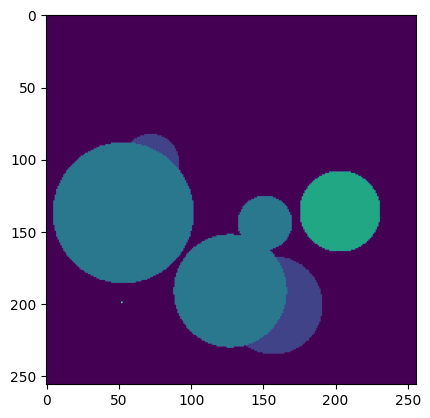

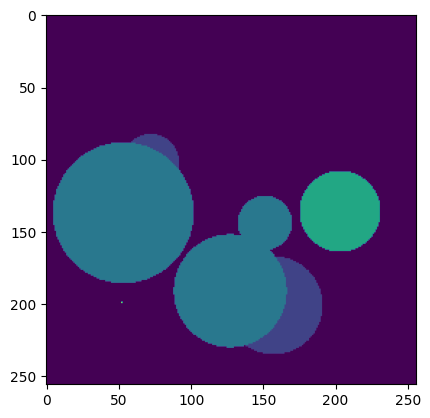

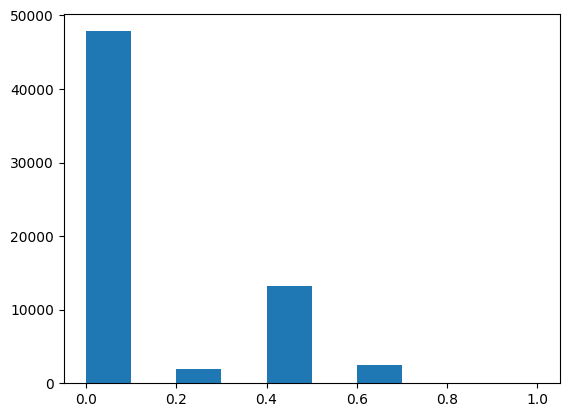

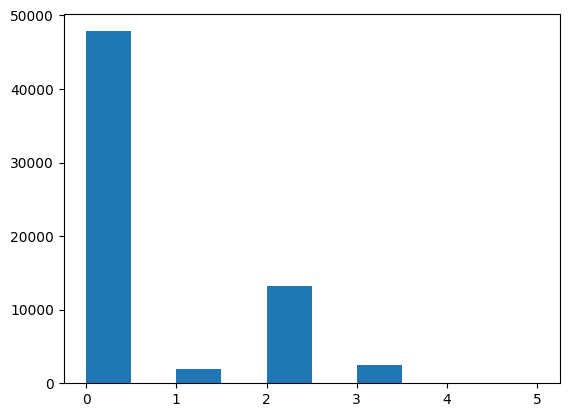

In [ ]:
plt.figure()# plot the image
plt.imshow(im[100])
plt.figure()# plot the segmentation
plt.imshow(seg[100])
plt.figure()
_=plt.hist(im[100].ravel())# each sphere has a grey intensity (0-1 level). It is discrete fow now
plt.figure()
_=plt.hist(seg[100].ravel())# each sphere has a label (a integer representing a class)

## 2. **What are array transforms?**

Transforms in MONAI are callable objects accepting inputs from initial data in a dataset or previous transforms. We can create and call these directly without any infrastructure or system setup as components in MONAI are designed to be as decoupled as possible. For example we can load one of our Nifti files directly by creating the transform and calling it.

Transforms are composed with `Compose` to create a sequence of operations. `Compose` itself being a transform we can also call it directly. The type of img here is `numpy.ndarray` so to convert to a Pytorch tensor as part of a training data pipeline we'd have `ToTensor` as the last transform in our sequence:

In [ ]:
trans = Compose([LoadImage(image_only=True), AddChannel(), ToTensor()])# this is the usual example pipeline that we always use.
# Load data --> Add a channel since we want to work with CNNs (usually), transform them to Tensors. MONAI takes care of everything

# Lets apply the new pipeline to the first sphere image
img = trans(filenames[0]["img"])
print(type(img), img.shape, img.get_device())# so it is a tensor with a shape [ch,x,y,z]

<class 'torch.Tensor'> torch.Size([1, 256, 256, 256]) -1


## **3. How do I create a custom transform?**
We can define our own custom transform operation in a number of ways. If a simple callable is used as an operator, `Lambda` can be used to wrap it as a transform. We define in this example a transform to average the image in the 1st (x, width) dimension to produce a 2D image:

(1, 256, 256)


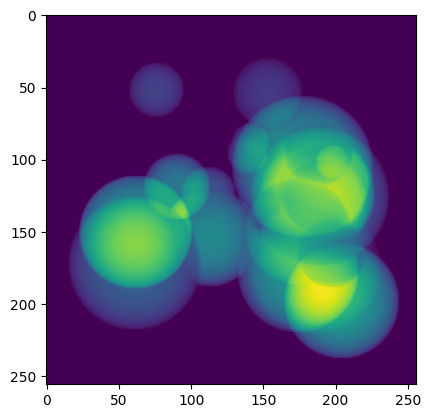

In [ ]:
def sum_width(img): # this is a dummy transformation that takes a volumetric image so [ch,x,y,z] and a return a 2D image
    return img.mean(axis=1) # axis =1 is the x axis

trans = Compose([LoadImage(image_only=True), AddChannel(), Lambda(sum_width)]) # Lamba is a MONAI wrapper that is used to add custom function to composed pipelines
img = trans(filenames[0]["img"])
plt.imshow(img[0])# the first axis is channel. With arr[0] we take the whole 2D image

print(img.shape)# it is a 2D image now!

Creating a subclass of Transform is the second method, and this has the advantage of being able to define attributes with the instantiated objects. Let's define a class to sum in a chosen dimension, and use it to average out the 2nd (height) dimension:

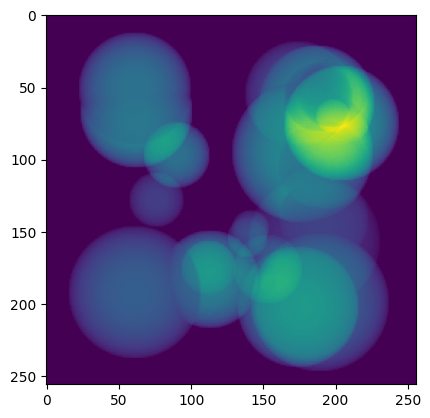

In [ ]:
class AverageDimension(Transform):# this is a transformation that depends on parameters
    def __init__(self, dim=1):
        self.dim = dim

    def __call__(self, inputs):
        return inputs.mean(axis=self.dim)

trans = Compose([LoadImage(image_only=True), AddChannel(), AverageDimension(2)])
img = trans(filenames[0]["img"])
plt.imshow(img[0])

Usually, when we perform data augmentation during training, we don't want to apply the same transformation to every image since we want to create variace in the dataset to help the network learning invariances.

We would like to apply our transfrmation only on a subset of the images at random.


All of these example transforms so far have been deterministic, to define transforms which perform some stochastic operation on input data we want to also inherit from `Randomizable`. This class is used to randomize variables but also distinguish from deterministic transforms. We'll see why this is important later in caching data loaders.

In this class we have a `numpy.random.RandomState` object to provide stochastic values. This can be replaced using `Randomizable.set_random_state()` to control the randomization process. The `randomize()` method is responsible for determining if the random operation is to be performed based on the `prob` probability member, then creates the random noise array if so. This functionality is in this method so that it can be called by `Compose` or other external controllers.

For now lets define a simple transform to add noise.

**Run this cell a few times to see the random transform being applied 50% of the time.**

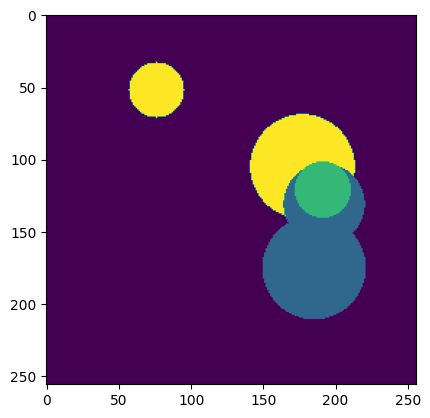

In [ ]:
class RandAdditiveNoise(Randomizable, Transform):
    def __init__(self, prob: float = 0.5, max_add: float = 1.0) -> None:
    # we are using annotation to make the code more clear
    # :float means that we expec a float as input and
    # -> int means that the function is returning an int (in this case the init does not retunt anything)

        self.prob = np.clip(prob, 0.0, 1.0)# probability to activate the function
        self.max_add = max_add# noise intensity
        self._noise = 0

    def randomize(self, data: np.ndarray) -> None:
        self._noise = 0

        if self.R.random() < self.prob:
            noise_array = self.R.rand(*data.shape[1:])[None]
            self._noise = (noise_array * self.max_add).astype(data.dtype)

    def add_noise(self, img: np.ndarray) -> np.ndarray:# we are returning a numpy array
        return img + self._noise

    def __call__(self, img: np.ndarray) -> np.ndarray:
      # when the function is called first it check if it is active (randomize) and if True it creates the noise.
      #Then the noise is added. If the transformation was not active the noise added is the default value that is zero. (in this way the add_noise() is always called so the pipeline is not broken and it is more difficult to introduce errors!)
        self.randomize(img)
        return self.add_noise(img)

trans = Compose([LoadImage(image_only=True), AddChannel(), RandAdditiveNoise()])
img = trans(filenames[0]["img"])
plt.imshow(img[0, 128])

## **4. What are dictionary transforms?**

So far we have seen transforms which are applied to individual Numpy arrays, however for most training schemes a pipeline with multiple values is needed. To address this MONAI includes transforms for operating on dictionaries of arrays, one for each equivalent array transform. These can be applied to named values in an input dictionary while leaving unnamed values untouched, for example adding noise to an image while leaving the associated label image untouched.

Earlier in the notebook we imported the dictionary equivalent transforms which have a `d` appended to their names, we'll use those transforms in this section.  The `keys` argument in `LoadNiftid` is used to state which keys contain paths to Nifti files, all other values in the input dictionary will be retained. With this set we can look at the keys returned when calling the transform:

In [ ]:
trans = LoadImaged(keys=fn_keys)
data = trans(filenames[0])
print(list(data.keys()))

['img', 'seg', 'img_meta_dict', 'seg_meta_dict']


`Lambdad` applies the given callable to each array named by `keys` separately. We can use this to define transforms operating on different named values in the dictionary at different points in the sequence:

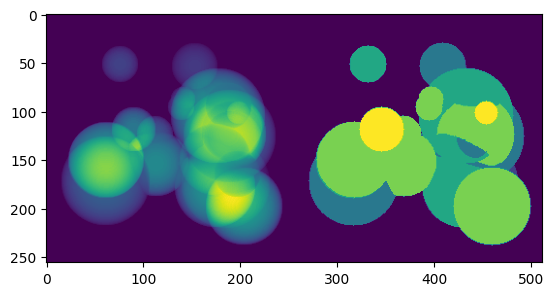

In [ ]:
# we want to appy transformations on both the image and its segmentation. With "Lambdad" we can define a transformation that depends on the dictionary key used

def sum_width(img):
    return img.sum(1)

def max_width(img):
    return img.max(1)

trans = Compose([LoadImaged(fn_keys), AddChanneld(fn_keys), Lambdad(("img",), sum_width), Lambdad(("seg",), max_width)])

imgd = trans(filenames[0])
img = imgd["img"]# we can select the transformation for images or for the segmentation
seg = imgd["seg"]

plt.imshow(np.hstack((img[0] * 5 / img.max(), seg[0])))

The above applies one operation to one member of the dictionary and different operation to another. A reasonable re-implementation of this in one transform would require retaining the names of which members to apply which transform to and applying the operations in one method. Adapting array-based transforms to operate over dictionaries is relatively straight-forward.

**Run this cell a few times to see the random transform being applied 50% of the time.**

### This is a more complex transformation that add noise is applyed to an image.

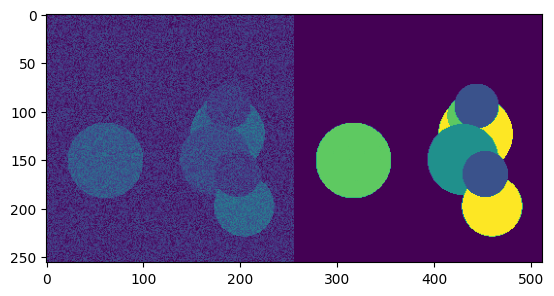

In [ ]:
class RandAdditiveNoised(Randomizable, MapTransform):
    def __init__(
        self, keys: KeysCollection, prob: float = 0.5, max_add: float = 1.0
    ) -> None:
        super(Randomizable, self).__init__(keys)
        self.transform = RandAdditiveNoise(prob, max_add)# the one we defined before

    def set_random_state(
        self, seed: Optional[int] = None, state: Optional[np.random.RandomState] = None
    ) -> "RandAdditiveNoised":
        self.transform.set_random_state(seed, state)
        super().set_random_state(seed, state)
        return self

    def randomize(self, data: Optional[Any] = None) -> None:
        self.transform.randomize(data)# the method of the function we defined before

    def __call__(
        self, data: Mapping[Hashable, np.ndarray]
    ) -> Mapping[Hashable, np.ndarray]:
        self.randomize(data[monai.utils.first(self.keys)])# create noise

        d = dict(data)
        for key in self.keys:
            d[key] = self.transform.add_noise(d[key])# add noise on the data that has the "key"
        return d

trans = Compose([LoadImaged(fn_keys), AddChanneld(fn_keys), RandAdditiveNoised(("img",),1)])# we are not using lambdas since this already is a transformation (see class inheritance above!)
img = trans(filenames[0])
plt.imshow(np.hstack([img["img"][0, 50], img["seg"][0, 50]])) # We're adding random noise to the image, not the segmentation

### just to show you how it works, lets apply the transform on the seg instead
(see how we put prob=1 to always perform the transformation. )

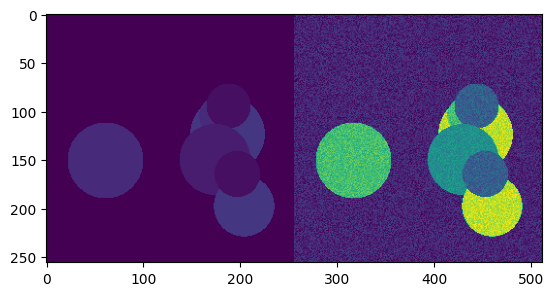

In [ ]:
trans = Compose([LoadImaged(fn_keys), AddChanneld(fn_keys), RandAdditiveNoised(("seg",),1)])# we are not using lambdas since this already is a transformation (see class inheritance above!)
img = trans(filenames[0])
plt.imshow(np.hstack([img["img"][0, 50], img["seg"][0, 50]])) # We're adding random noise to the image, not the segmentation

In [ ]:
# just to show you how it works, lets apply the transform on the seg instead

Method overrides are provided to delegate behaviour to an internal `RandAdditiveNoise` instance:
* `set_random_state` sets the state of the delegate and the current object
* `randomize` delegates the randomization to the `RandAdditiveNoise` instance
* `__call__` causes the delegate to randomize then applies the transform to each named member of the dictionary. The delegate transform is randomized only once, this ensures the same random field is added to each named member of the dictionary, a slightly different implementation adding a per-key random field would be needed if this were the desired behaviour.

## **5. How do I create a basic MONAI dataset with transforms?**

Now that we've taken a look at transform, let's take a look at datasets. With a data source and transforms defined we can now create a dataset object. The base class for MONAI is `Dataset`, created here to load the image Nifti files only.

`Dataset` inherits from the Pytorch class of that name and adds only the ability to apply the given transform to selected items. If you're familiar with the class from Pytorch this will work the same way.

In [ ]:
images = [fn["img"] for fn in filenames]

transform = Compose([LoadImage(image_only=True), AddChannel(), ToTensor()])
ds = Dataset(images, transform)
img_tensor = ds[0]
print(img_tensor.shape, img_tensor.get_device())

torch.Size([1, 256, 256, 256]) -1


MONAI provides the `ArrayDataset` for supervised training applications specifically. It can accept data arrays for images separate from those for segmentations or labels with their own separate transforms. Here we will again separate out the image and segmentation filenames to demonstrate this usage:

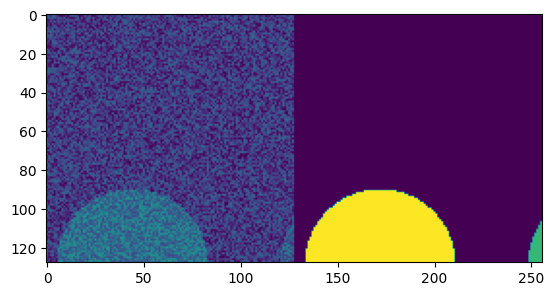

In [ ]:
images = [fn["img"] for fn in filenames]
segs = [fn["seg"] for fn in filenames]

img_transform = Compose([LoadImage(image_only=True), AddChannel(), RandSpatialCrop((128, 128, 128), random_size=False), RandAdditiveNoise(1), ToTensor()])
seg_transform = Compose([LoadImage(image_only=True), AddChannel(), RandSpatialCrop((128, 128, 128), random_size=False), ToTensor()])

#RandSpatialCrop((128, 128, 128) is a crop of the image. Since we want to crop the same area in the image and in the segmentation we can merge the transform in a ArrayDataset

ds = ArrayDataset(images, img_transform, segs, seg_transform)# pairs of datsets and transforms
im, seg = ds[0]
plt.imshow(np.hstack([im.numpy()[0, 48], seg.numpy()[0, 48]]))

Instead of returning a single image, accessing a member of the dataset produces a pair containing the image and segmentation after being pass through their respective transforms. One important aspect of this class is that the random state of each transform (`Compose` in this case) is set to that of the dataset before being applied. This ensures the same random operations are applied to each output, which is why the `RandSpatialCrop` operation chooses the same crop window for the image as well as the segmentation. By having separate transforms one can apply operations to images and not to segmentations (or vice versa), being careful that these unshared operations come after the shared ones.

Alternatively, `Dataset` can be used with dictionary-based transforms to construct a result mapping. For training applications beyond simple input/ground-truth pairs like the above this would be more suitable:

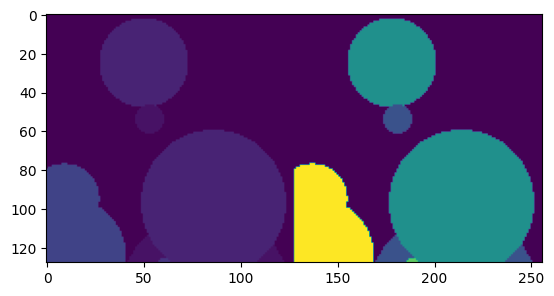

In [ ]:
trans = Compose([LoadImaged(fn_keys), AddChanneld(fn_keys), RandAdditiveNoised(("img",)), RandSpatialCropd(fn_keys, (128, 128, 128), random_size=False), ToTensord(fn_keys)])

ds = Dataset(filenames, trans)
item = ds[0]
im, seg = item["img"], item["seg"]
plt.imshow(np.hstack([im.numpy()[0, 48], seg.numpy()[0, 48]]))

With the dataset defined, we can now create the dataloader to create data batches. This inherits directly from Pytorch's `DataLoader` class with a few changes to the default constructor arguments. MONAI functionality should be compatible with the PyTorch DataLoader, but it was subclasses to include additional functionality that we consider key and which cannot be realized with the standard DataLoader class.

The `DataLoader` will use five worker processes to load the actual data. MONAI provides a number of `Dataset` subclasses to improve the efficiency of this process. These and other features will be covered in subsequent labs.

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


['img', 'seg', 'img_meta_dict', 'seg_meta_dict', 'img_transforms', 'seg_transforms'] torch.Size([5, 1, 128, 128, 128])


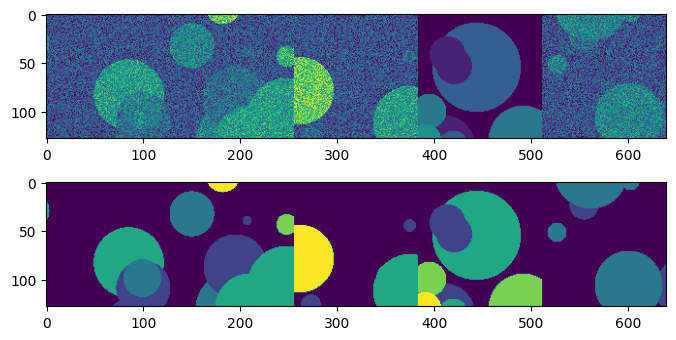

In [ ]:
loader = DataLoader(ds, batch_size=10, num_workers=5)
batch = first(loader)
print(list(batch.keys()), batch["img"].shape)

f, ax = plt.subplots(2, 1, figsize=(8, 4))
ax[0].imshow(np.hstack(batch["img"][:, 0, 64]))
ax[1].imshow(np.hstack(batch["seg"][:, 0, 64]))

## **Custom transformation 1 (hand made)**

Now we want to create a transform which selects a patch from an input image of a given size and randomly chooses to transpose this data along randomly chosen axes. For example, this could produce an image where a patch in the center has been flipped in the horizontal direction while the rest of the image is left unchanged.

Assumptions:
* Implement this as an array randomized transform
* Use a default probability ratio of 40% chance to crop
* Use one of the test 3D images from above to validate
* Default crop size is 100 but allow it to be variable
* Don't worry about edge cases


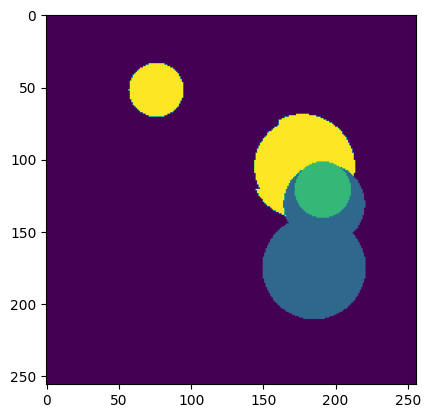

In [ ]:
class RandFlipRect(Randomizable, Transform):
    """
    Define a transform to randomly transpose a patch of the input image along randomly chosen spatial dimensions. This
    uses arguments `prob` for the probability the transform is applied, and `size` giving the size of the cube to flip.
    """
    def __init__(self, prob: float = 0.4, size: int = 100) -> None:# default values
        self.prob = #something user defined but forced to be 0-1
        self.size = size

    def random_flip(self, data: np.ndarray) -> None:
        if self.R.random() < self.prob:
            height = data.shape[1]
            width = data.shape[2]
            depth = data.shape[3]

            x = self.R.randint(0, height - self.size)
            y = self.R.randint(0, width - self.size)
            z = self.R.randint(0, depth - self.size)
            # select a patch
            patch = data[..., x: x + self.size , y: y + self.size, z: z + self.size]# select a patch

            #########
            #something to flip the patch
            ########


            #put the patch back
            data[..., x: x + self.size , y: y + self.size, z: z + self.size]=patch

        return data

    def __call__(self, img: np.ndarray) -> np.ndarray:
        return self.random_flip(img)

trans = Compose([LoadImage(image_only=True), AddChannel(), RandFlipRect(prob=1)])
img = trans(filenames[0]["img"])
plt.imshow(img[0, img.shape[1]//2])

## **Transformation  2**

Lets use a dictionary-based transform pipeline which will take input images and segmentations and ensure:
* both image and segmentation arrays have a channel dimension
* each image/segmentation pair is 200x200x200 pixels in shape
* the value range of each image is between 0 and 1
* the dtype of the image is float32 and that of the segmentation is int32
* both are produced in the end as tensors

All this can be done with built-in transforms so you shouldn't need a lambda transform. Once your pipeline works, use it to construct and dataset and then a data loader. Iterate over every value in the data loader and check that the image and segmentation members of the produced dictionaries meet these requirements.

torch.Size([1, 200, 200, 200])
torch.float32 torch.int32
tensor(0.) tensor(1.)
tensor([0, 1, 2, 3, 4, 5], dtype=torch.int32)
torch.Size([3, 1, 200, 200, 200])
torch.float32 torch.int32
tensor(0.) tensor(1.)
tensor([0, 1, 2, 3, 4, 5], dtype=torch.int32)
torch.Size([2, 1, 200, 200, 200])
torch.float32 torch.int32
tensor(0.) tensor(1.)
tensor([0, 1, 2, 3, 4, 5], dtype=torch.int32)


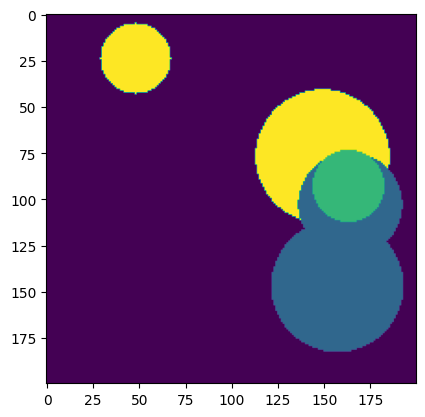

In [ ]:
import torch
from monai.transforms import LoadImaged, CenterSpatialCropd, AddChanneld, ScaleIntensityd, CastToTyped, ToTensord

trans = Compose(
    [
        LoadImaged(fn_keys, image_only=True),
        #both image and segmentation arrays have a channel dimension
        #each image/segmentation pair is 200x200x200 pixels in shape
        #the value range of each IMAGE ONLY is between 0 and 1
        #the dtype of the image is float32 and that of the segmentation is int32
        ToTensord(fn_keys),
    ]
)

data = trans(filenames[0])
img = data["img"]
seg = data["seg"]

print(img.shape)  # should be (1, 200, 200, 200)
print(img.dtype, seg.dtype)  # should be float32  int32
print(img.min(), img.max())  # should be 0.0 1.0
print(torch.unique(seg))  # should be [0 1 2 3 4 5]

plt.imshow(img[0, img.shape[1] // 2])

# construct dataset and dataloder here and iterate over batches, batch_size of 1 should be used

ds = Dataset(filenames,transform=trans)#the transform is applied directly to the image
loader= DataLoader(ds,batch_size=3)

for batch in loader:
    img = batch["img"]
    seg = batch["seg"]

    print(img.shape)  # should be (3, 1, 200, 200, 200) and (2, 1, 200, 200, 200) - first batch has 3, second has 2.
    print(img.dtype, seg.dtype)  # should be float32  int32
    print(img.min(), img.max())  # should be 0.0 1.0
    print(torch.unique(seg))  # should be [0 1 2 3 4 5]

## **1. What is a MONAI Dataset?**


In [ ]:
items = [{"data": 4},
         {"data": 9},
         {"data": 3},
         {"data": 7},
         {"data": 1},
         {"data": 2},
         {"data": 5}]
dataset = monai.data.Dataset(items, transform=None)

print(f"Length of dataset is {len(dataset)}")
for item in dataset:
    print(item)

Length of dataset is 7
{'data': 4}
{'data': 9}
{'data': 3}
{'data': 7}
{'data': 1}
{'data': 2}
{'data': 5}


### Load items with a customized transform

We'll create a custom transform called `SquareIt`, which will replace the corresponding value of the input's `keys` with a squared value. In our case, `SquareIt(keys='data')` will apply the square transform to the value of `x['data']`.

In [ ]:
class SquareIt(MapTransform):
    def __init__(self, keys):
        MapTransform.__init__(self, keys)
        print(f"keys to square it: {self.keys}")

    def __call__(self, x):
        key = self.keys[0]
        data = x[key]
        output = {key: data ** 2}
        return output

square_dataset = Dataset(items, transform=SquareIt(keys='data'))
for item in square_dataset:
    print(item)

keys to square it: ('data',)
{'data': 16}
{'data': 81}
{'data': 9}
{'data': 49}
{'data': 1}
{'data': 4}
{'data': 25}


#### Compatible with the PyTorch DataLoader

MONAI functionality should be compatible with the PyTorch DataLoader, although free to subclass from it if there is additional functionality that we consider key, which cannot be realized with the standard DataLoader class.

In [ ]:
for item in torch.utils.data.DataLoader(dataset, batch_size=2):
    print(item)

{'data': tensor([4, 9])}
{'data': tensor([3, 7])}
{'data': tensor([1, 2])}
{'data': tensor([5])}


## **3. What common datasets are provided by MONAI?**

To quickly get started with popular training data in the medical domain, MONAI provides several data-specific Datasets(like: MedNISTDataset, DecathlonDataset, etc.), which include downloading from our AWS storage, extracting data files and support generation of training/evaluation items with transforms.

The [DecathlonDataset](https://docs.monai.io/en/latest/data.html?highlight=dataset#decathlon-datalist) function leverages the features described throughout this notebook.  

These datasets can be used to test the model (like MNIST) or to perform a transfer learning with more ease.

In [ ]:
dataset = monai.apps.DecathlonDataset(root_dir="./", task="Task09_Spleen", section="training", download=True)

Task09_Spleen.tar:  89%|████████▉ | 1.33G/1.50G [01:15<00:09, 19.8MB/s]

In [ ]:
print(dataset.get_properties("numTraining"))
print(dataset.get_properties("description"))

In [ ]:
print(dataset[0]['image'].shape)
print(dataset[0]['label'].shape)

In [ ]:
_=plt.hist(dataset[0]['image'][:,:,:].ravel())

In [ ]:
plt.imshow(dataset[0]['image'][:,:,30],cmap="Greys_r",vmin=-600,vmax=400)

In [ ]:
plt.imshow(dataset[0]['label'][:,:,30])

## 4. **What Network and Network components does MONAI provide?**

MONAI provides definitions for networks and their components that inherit directly from Pytorch Module, Sequential, etc. These general purpose networks include parameterized topologies that can easily be expanded are independent from rest of MONAI so networks can be used with existing training code.

MONAI includes the following submodules:
- layers: defines low level layers, factories for selecting Pytorch and custom layers based on dimension and other arguments
- blocks: mid-level building blocks defining specific reusable concepts networks are constructed from
- nets: full network definitions for common architectures, eg. UNet, VNet, Densenet,

Blocks and networks use LayerFactory objects as generic factory for custom and PyTorch layers.

MONAI provides blocks for defining:
- Convolution with activation and regularization
- Residual units
- Squeeze/excitation
- Downsampling/upsampling
- Subpixel convolutions


### How do you use MONAI Layers?

In [ ]:
from monai.networks.layers import Conv, Act, split_args, Pool

### Convolution as an example

The [Conv](https://docs.monai.io/en/latest/networks.html#convolution) class has two options for the first argument. The second argument must be the number of spatial dimensions, `Conv[name, dimension]`, for example:

In [ ]:
print(Conv[Conv.CONV, 1])
print(Conv[Conv.CONV, 2])
print(Conv[Conv.CONV, 3])
print(Conv[Conv.CONVTRANS, 1])
print(Conv[Conv.CONVTRANS, 2])
print(Conv[Conv.CONVTRANS, 3])

The configured classes are the "vanilla" PyTorch layers. We could create instances of them by specifying the layer arguments:

In [ ]:
print(Conv[Conv.CONV, 2](in_channels=1, out_channels=4, kernel_size=3))
print(Conv[Conv.CONV, 3](in_channels=1, out_channels=4, kernel_size=3))

The [Act](https://docs.monai.io/en/latest/networks.html#module-monai.networks.layers.Act) classes don't require the spatial dimension information, but supports additional arguments.

In [ ]:
print(Act[Act.PRELU])
Act[Act.PRELU](num_parameters=1, init=0.1)

These could be fully specified with a tuple of `(type_name, arg_dict)`, such as `("prelu", {"num_parameters": 1, "init": 0.1})`:

In [ ]:
act_name, act_args = split_args(("prelu", {"num_parameters": 1, "init": 0.1}))
Act[act_name](**act_args)

## **5. How do you use these components to create a network?**

### Flexible Definition Networks

These APIs allow for flexible definitions of networks.  Below we'll create a class called `MyNetwork` that utilizes `Conv`, `Act`, and `Pool`.  Each Network requires an `__init__` and a `forward` function.

In [ ]:
class MyNetwork(torch.nn.Module):

  def __init__(self, dims=3, in_channels=1, out_channels=8, kernel_size=3, pool_kernel=2, act="relu"):
    super(MyNetwork, self).__init__()
    # convolution
    self.conv = Conv[Conv.CONV, dims](in_channels, out_channels, kernel_size=kernel_size)
    # activation
    act_type, act_args = split_args(act)
    self.act = Act[act_type](**act_args)
    # pooling
    self.pool = Pool[Pool.MAX, dims](pool_kernel)

  def forward(self, x: torch.Tensor):
    x = self.conv(x)
    x = self.act(x)
    x = self.pool(x)
    return x

This network definition can be instantiated to support either 2D or 3D inputs, with flexible kernel sizes.  It becomes handy when adapting the same architecture design for different tasks, switching among 2D, 2.5D, 3D easily.

Almost all the MONAI layers, blocks and networks are extensions of `torch.nn.modules` and follow this pattern. This makes the implementations compatible with any PyTorch pipelines and flexible with the network design. The current collections of those differentiable modules are listed in https://docs.monai.io/en/latest/networks.html.

In [ ]:
# default network instance
default_net = MyNetwork()
print(default_net)
print(default_net(torch.ones(3, 1, 20, 20, 30)).shape)

# 2D network instance
elu_net = MyNetwork(dims=2, in_channels=3, act=("elu", {"inplace": True}))
print(elu_net)
print(elu_net(torch.ones(3, 3, 24, 24)).shape)

# 3D network instance with anisotropic kernels
sigmoid_net = MyNetwork(3, in_channels=4, kernel_size=(3, 3, 1), act="sigmoid")
print(sigmoid_net)
print(sigmoid_net(torch.ones(3, 4, 30, 30, 5)).shape)

MONAI provides over 20 Networks including:
- UNet
- VNet
- AHNet
- VGG-like regressor, classifier, discriminator, critic
- HighResNet
- SENet

### Example UNets

We'll define a 2D UNet network with 2 hidden layers having outputs with 8 channels, and a bottom (bottleneck) layer producing outputs with 32 channels.  The stride values state the stride for the initial convolution, ie. downsampling in down path and upsampling in up path and it'll transpose the convolutions used to implement upsampling.


In [ ]:
net = monai.networks.nets.UNet(
    dimensions=2,  # 2 or 3 for a 2D or 3D network
    in_channels=1,  # number of input channels
    out_channels=1,  # number of output channels
    channels=[8, 16, 32],  # channel counts for layers
    strides=[2, 2]  # strides for mid layers
)

Here we'll define a 4–layer 3D UNet with leaky ReLU activation in place of default PReLU.  THis time we'll instantiate the Act parameter which is the activation layer factory, and recalls names of known activation layers, eg. LEAKYRELU.  You can add custom layers to all factories.

In [ ]:
net = monai.networks.nets.UNet(
    dimensions=3,
    in_channels=1,
    out_channels=1,
    channels=[8, 16, 32, 64],
    strides=[2, 2, 2],
    act=monai.networks.layers.Act.LEAKYRELU
)

In [ ]:
from monai.networks.nets import DenseNet121

net = DenseNet121(
    spatial_dims=2,
    in_channels=2,
    out_channels=3
)
print(net)

Some networks, such as UNet, are defined using template methods to create their layers. Experiment with extending one of these classes to change the composition of the created network by overriding these methods:

In [ ]:
import torch.nn as nn
from monai.networks.layers.factories import Conv
from monai.networks.nets import UNet


class MyUNet(UNet):
    def _get_down_layer(self, in_channels: int, out_channels: int, strides: int, is_top: bool) -> nn.Module:
        conv_type = Conv[Conv.CONV, self.dimensions]
        return conv_type(in_channels, out_channels, self.kernel_size)


unet = MyUNet(2, 1, 1, [2, 4, 8, 16], [2, 2, 2])
print(unet)